# Clasificador k-NN (k-Nearest Neighbours)
El k-NN fue diseñado por Evelyn Fix y J.L Hodges, de la Universidad de California Berkeley, en 1951. Es un algoritmo de clasificación (pensado para distinguir entre DOS clases) basado en métricas, que utiliza generalmente la función de distancia euclidiana, pero es posible utilizarlo mediante cualquier otra función de distancia.


```Algoritmo:```

1. Elegir el valor para $k$ (usualmente 1, 3, 5).<br>
2. Elegir una métrica (euclidiana, mahalanobis, etc.).<br>
Para cada patrón a clasificar:<br>
3. Calcular la distancia entre el patrón a clasificar y los patrones de entrenamiento.<br>
4. Dependiendo del valor de $k$:<br>
a) si $k=1$. Identificar la menor distancia. El patrón se clasifica con la misma clase que el patrón al cual la distancia fue menor.<br>
b) si $k\neq1$. Identificar las $k$ menores distancias. El patrón se clasifica por mayoría de clases de los $k$ patrones cuyas distancias fueron las menores.<br>




### Mostrar los datos

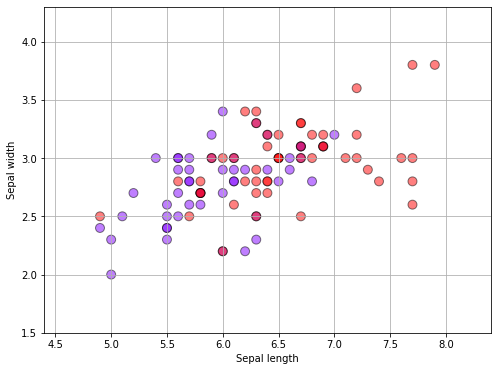

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
XX = iris.data
yy = iris.target

X = XX[50:,:]
y = yy[50:]

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(8, 6))

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow,
            edgecolor='k', s=80, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid()

plt.show()

### Importar clasificador
Usaremos scikit-learn para este propósito

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(neighbors.VALID_METRICS['brute'])

n_neighbors = 1 # Éste es el valor de k
clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                           metric = 'minkowski', p = 2)
clf.fit(X, y)
prediccion = clf.predict(X)
score = clf.score(X,y)

print('Eficiencia en predicción: ', score)
print('\nPrediccion:\n', prediccion)
print('\nClase verdadera:\n', y)
print('\nErrores: ',np.sum(abs(y-prediccion)))

['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']
Eficiencia en predicción:  1.0

Prediccion:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Clase verdadera:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

### Con figuritas
También usamos hold-out

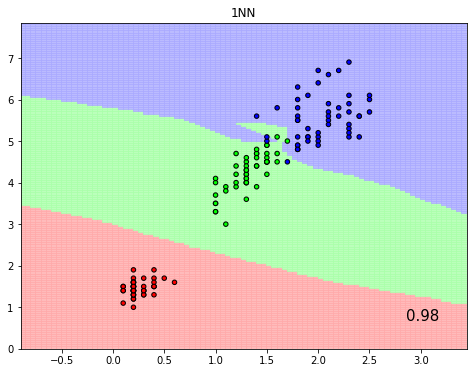

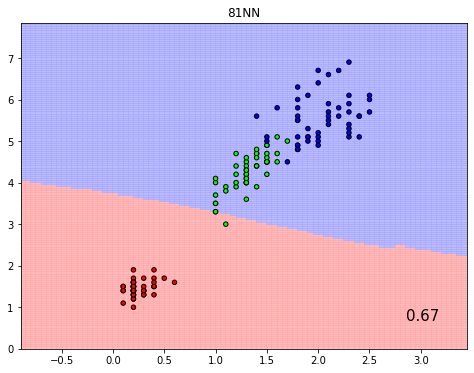

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# Tomamos dos atributos
X = X[:, [3, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

h = 0.05  # para graficar regiones de decisión

# Mapas de color
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['1NN', '81NN']

classifiers = [KNeighborsClassifier(n_neighbors=1),
               KNeighborsClassifier(n_neighbors=81)]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Para graficar las regiones de decsión, se clasifican muchos puntos
    # dentro de los puntos reales del dataset
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Se grafica y colorea el resultado
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Se ponen encima los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Se agrega una leyenda
    plt.title("{}".format(name))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

### Con otros clasificadores
También usamos hold-out

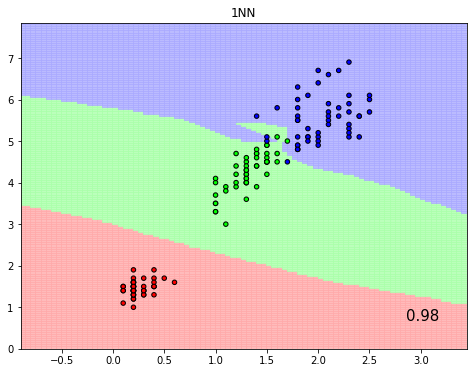

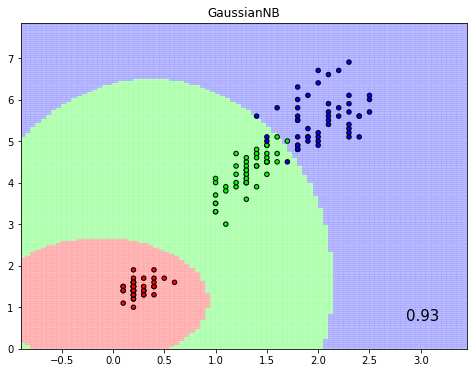

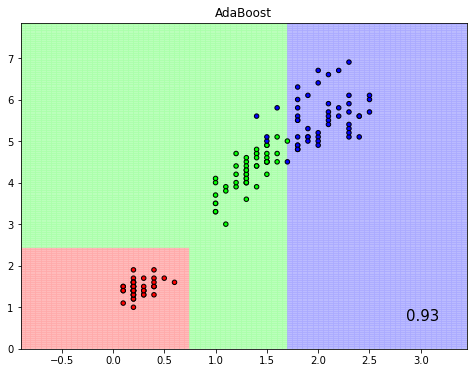

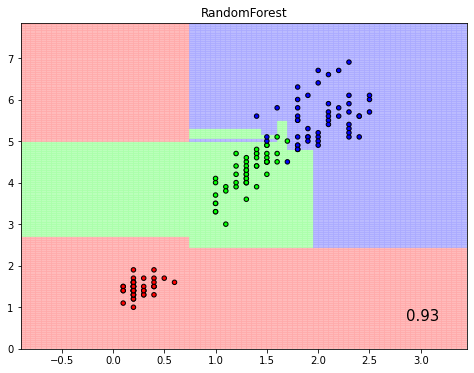

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# Tomamos dos atributos
X = X[:, [3, 2]]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

h = 0.05  # para graficar regiones de decisión

# Mapas de color
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

names = ['1NN', 'GaussianNB','AdaBoost','RandomForest']

classifiers = [KNeighborsClassifier(n_neighbors=1),
               GaussianNB(),
               AdaBoostClassifier(),
               RandomForestClassifier()]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Para graficar las regiones de decsión, se clasifican muchos puntos
    # dentro de los puntos reales del dataset
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Se grafica y colorea el resultado
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Se ponen encima los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Se agrega una leyenda
    plt.title("{}".format(name))
    plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15,
             ha='center', va='center', transform=plt.gca().transAxes)

plt.show()